In [1]:
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade Fraction
!pip install --upgrade scipy

Requirement already up-to-date: numpy in c:\users\vassi\appdata\local\programs\python\python37\lib\site-packages (1.17.4)
Requirement already up-to-date: matplotlib in c:\users\vassi\appdata\local\programs\python\python37\lib\site-packages (3.1.2)
Requirement already up-to-date: Fraction in c:\users\vassi\appdata\local\programs\python\python37\lib\site-packages (1.1.0)
Requirement already up-to-date: scipy in c:\users\vassi\appdata\local\programs\python\python37\lib\site-packages (1.3.3)


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin
from fractions import gcd
import scipy.signal

In [3]:
""" 1.a """
def sq_triangle (A, f, tmin, tmax):
    """ Creates a square triangle function with amplitude A
    and frequency f in the time [tmin, tmax] """
    
    T = 1/f #period
    t0 = T/2

    periods = (tmax - tmin)/T #how many periods are in the [tmin, tmax]
    n = np.linspace(tmin, tmax, num = (int)(10000*periods)) #10000 samples per period
    
    e1 = lambda t : (4*t/T) - 1
    e2 = lambda t : -(4*t/T) + 3
    square = lambda e : (A*e)**2
    tri = map(lambda t : square(e1(t%T)) if (t%T<= t0) else square(e2(t%T)) , n)
    
    return n, list(tri)

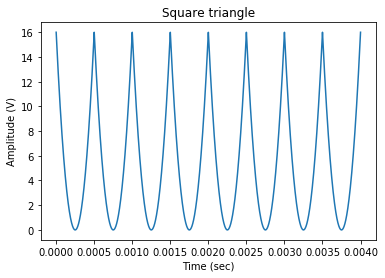

In [55]:
""" ΑΜ: 03115082 άρα 0+8+2=10 και 1+0=1 οπότε fm = 1 kHz"""
fm = 1*10**3 #Hz
A = 4 #Volt

Tm = 1/fm #sec

tmin, tmax = 0, 4*Tm #4 periods
n, tri = sq_triangle(A, fm, tmin, tmax)

plt.plot(n, tri)
plt.title('Square triangle')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

In [57]:
def sampling(signal, Ts, tmin, tmax):
    n = np.arange((int)(tmin / Ts), (tmax / Ts))
    y_out = map(lambda m : signal[(int)((len(signal))*((m*Ts - tmin)/(tmax - tmin)))] , n)
    
    return n, list(y_out)

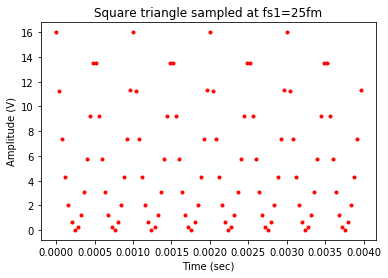

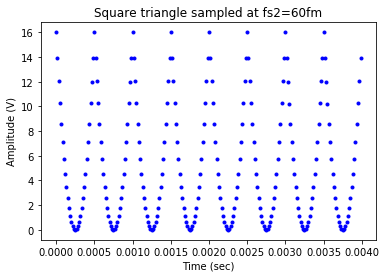

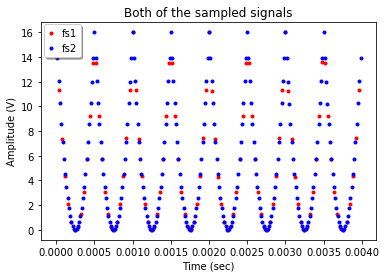

In [51]:
fs1, fs2 = 25 * fm, 60 * fm #Hz
Ts1, Ts2 = 1.0 / fs1, 1.0 / fs2 #sec

# Signals sampled at fs1 and fs2
n1, y1 = sampling(tri, Ts1, tmin, tmax)
n2, y2 = sampling(tri, Ts2, tmin, tmax)

""" (i) """
plt.plot(n1*Ts1, y1, '-r.',markersize=6, linewidth=0)
plt.title('Square triangle sampled at fs1=25fm')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

""" (ii) """
plt.plot(n2*Ts2, y2, '-b.',markersize=6, linewidth=0)
plt.title('Square triangle sampled at fs2=60fm')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

""" (iii) """
plt.plot(n1*Ts1, y1, '-r.',markersize=6, linewidth=0)
plt.plot(n2*Ts2, y2, '-b.',markersize=6, linewidth=0)
plt.title('Both of the sampled signals')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.legend(('fs1', 'fs2'), shadow=True, loc=(0.01, 0.84), handlelength=0.5, fontsize=10)
plt.show()

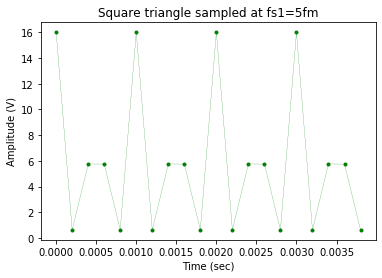

In [70]:
""" 1.b """
fs = 5 * fm #Hz
Ts = 1.0 / fs #sec

# Signals sampled at fs=5fm
n, y = sampling(tri, Ts, tmin, tmax)

plt.plot(n*Ts, y, '-g.',markersize=6, linewidth=0.2)
plt.title('Square triangle sampled at fs1=5fm')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

In [82]:
""" 1.c """
def sampled_sin (signal, Ts, tmin, tmax):
    n = np.arange((int)(tmin / Ts), (tmax / Ts))
    y_out = map(lambda m : signal(m*Ts), n)
    
    return n, list(y_out)

In [1]:
""" ΑΜ: 03115082 άρα 0+8+2=10 και 1+0=1 οπότε fm = 1 kHz """
fm = 1*10**3 #Hz
Tm = 1.0 / fm #sec
A = 1 #Volt
tmin, tmax = 0, 4*Tm #4 periods
z = lambda t : A*sin(2*pi*fm*t)

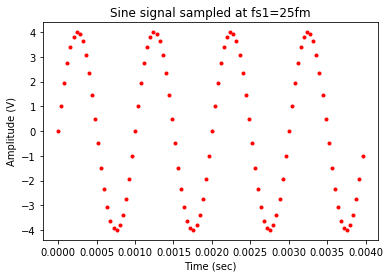

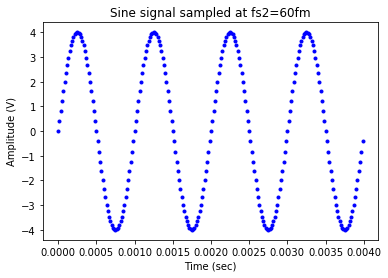

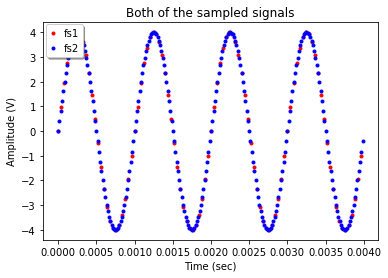

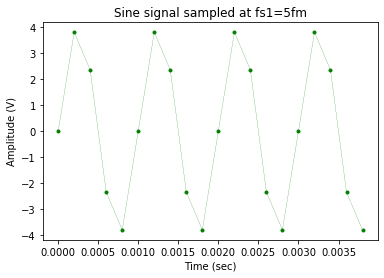

In [84]:
fs1, fs2 = 25 * fm, 60 * fm #Hz
Ts1, Ts2 = 1.0 / fs1, 1.0 / fs2 #sec

# Signals sampled at fs1 and fs2
n1, y1 = sampled_sin (z, Ts1, tmin, tmax)
n2, y2 = sampled_sin (z, Ts2, tmin, tmax)

""" (i) """
plt.plot(n1*Ts1, y1, '-r.',markersize=6, linewidth=0)
plt.title('Sine signal sampled at fs1=25fm')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

plt.plot(n2*Ts2, y2, '-b.',markersize=6, linewidth=0)
plt.title('Sine signal sampled at fs2=60fm')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

plt.plot(n1*Ts1, y1, '-r.',markersize=6, linewidth=0)
plt.plot(n2*Ts2, y2, '-b.',markersize=6, linewidth=0)
plt.title('Both of the sampled signals')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.legend(('fs1', 'fs2'), shadow=True, loc=(0.01, 0.84), handlelength=0.5, fontsize=10)
plt.show()

fs = 5 * fm #Hz
Ts = 1.0 / fs #sec

# Signals sampled at fs=5fm
n, y = sampled_sin (z, Ts, tmin, tmax)

plt.plot(n*Ts, y, '-g.',markersize=6, linewidth=0.2)
plt.title('Sine signal sampled at fs1=5fm')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

In [92]:
""" ΑΜ: 03115082 άρα 0+8+2=10 και 1+0=1 οπότε fm = 1 kHz """
fm = 1*10**3 #Hz
Tm = 1.0 / fm #sec
A = 4 #Volt
L = 1*10**3 #Hz
tmin, tmax = 0, Tm #1 period
q = lambda t : z(t) + sin(2*pi*(fm + L)*t)

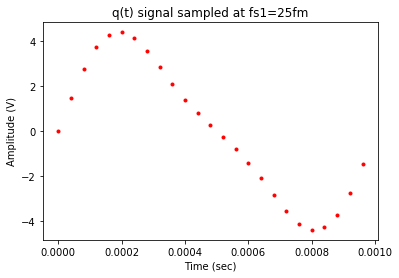

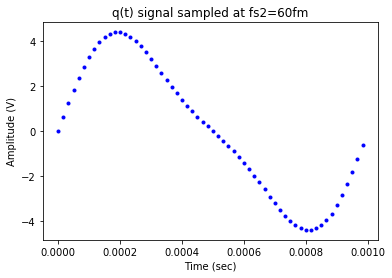

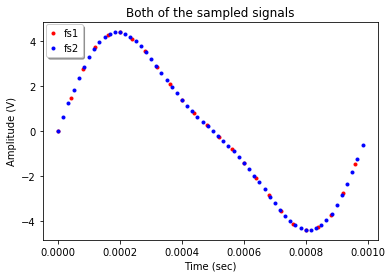

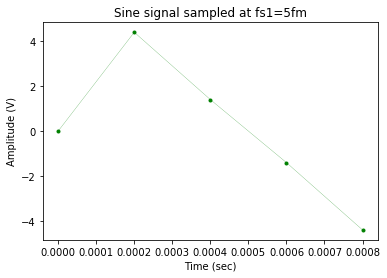

In [94]:
""" (ii) """
fs1, fs2 = 25 * fm, 60 * fm #Hz
Ts1, Ts2 = 1.0 / fs1, 1.0 / fs2 #sec

# Signals sampled at fs1 and fs2
n1, y1 = sampled_sin (q, Ts1, tmin, tmax)
n2, y2 = sampled_sin (q, Ts2, tmin, tmax)

plt.plot(n1*Ts1, y1, '-r.',markersize=6, linewidth=0)
plt.title('q(t) signal sampled at fs1=25fm')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

plt.plot(n2*Ts2, y2, '-b.',markersize=6, linewidth=0)
plt.title('q(t) signal sampled at fs2=60fm')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

plt.plot(n1*Ts1, y1, '-r.',markersize=6, linewidth=0)
plt.plot(n2*Ts2, y2, '-b.',markersize=6, linewidth=0)
plt.title('Both of the sampled signals')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.legend(('fs1', 'fs2'), shadow=True, loc=(0.01, 0.84), handlelength=0.5, fontsize=10)
plt.show()

fs = 5 * fm #Hz
Ts = 1.0 / fs #sec

# Signals sampled at fs=5fm
n, y = sampled_sin (q, Ts, tmin, tmax)

plt.plot(n*Ts, y, '-g.',markersize=6, linewidth=0.2)
plt.title('Sine signal sampled at fs1=5fm')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()